In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, pyplot

In [2]:
%matplotlib inline  
font_name = font_manager.FontProperties(fname="NanumGothic.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel('./depreciation_cost_original.xlsx', sheet='18추정')
df.columns = [col.strip() for col in df.columns]
column_dict = {
    'Serial No.': 'serial_no', 
    'Warranty기간': 'warranty_period', 
    '내용연수': 'years', 
    '담당코스트센타': 'cost_depart_id', 
    '담당코스트센터명': 'cost_depart_name', 
    '보조번호': 'sub_id', 
    '본부/부문': 'section_name', 
    '분류': 'cate_id', 
    '분류명': 'cate_name', 
    '사업영역': 'business_area', 
    '수  량': 'val', 
    '유지보수금액': 'maintenance_cost', 
    '유지보수율': 'maintenance_ratio', 
    # '자본화연도': 'intro_year', 
    # '자본화월': 'intro_month', 
    '자본화일': 'intro_date', 
    '자산내역': 'asset_name', 
    '자산번호': 'id', 
    '자산상세내역': 'asset_details', 
    '자산클래스': 'asset_class_id', 
    '자산클래스명': 'asset_class_name', 
    '전기말감가상각누계액': 'prev_depre_cost', 
    '총취득원가': 'original_price', 
    '코스트센터': 'depart_id', 
    '코스트센터명': 'depart_name'
}
df = df.rename(column_dict, axis=1)
df = df.loc[:, column_dict.values()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 23 columns):
serial_no            5 non-null object
warranty_period      0 non-null float64
years                4034 non-null int64
cost_depart_id       4034 non-null int64
cost_depart_name     4034 non-null object
sub_id               4034 non-null int64
section_name         0 non-null float64
cate_id              4032 non-null object
cate_name            4032 non-null object
business_area        4034 non-null object
val                  4034 non-null int64
maintenance_cost     0 non-null float64
maintenance_ratio    0 non-null float64
intro_date           4034 non-null object
asset_name           4034 non-null object
id                   4034 non-null int64
asset_details        858 non-null object
asset_class_id       4034 non-null int64
asset_class_name     4034 non-null object
prev_depre_cost      0 non-null float64
original_price       4034 non-null int64
depart_id            4034 non-nu

/home/admin-/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [4]:
df.columns

Index(['serial_no', 'warranty_period', 'years', 'cost_depart_id',
       'cost_depart_name', 'sub_id', 'section_name', 'cate_id', 'cate_name',
       'business_area', 'val', 'maintenance_cost', 'maintenance_ratio',
       'intro_date', 'asset_name', 'id', 'asset_details', 'asset_class_id',
       'asset_class_name', 'prev_depre_cost', 'original_price', 'depart_id',
       'depart_name'],
      dtype='object')

In [5]:
df_depre = df.loc[:, ['asset_name', 'asset_class_name', 'original_price', 'depart_name', 'cate_name', 'intro_date']]

In [6]:
df_depre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 6 columns):
asset_name          4034 non-null object
asset_class_name    4034 non-null object
original_price      4034 non-null int64
depart_name         4034 non-null object
cate_name           4032 non-null object
intro_date          4034 non-null object
dtypes: int64(1), object(5)
memory usage: 189.2+ KB


In [7]:
df_depre.head()

,asset_name,asset_class_name,original_price,depart_name,cate_name,intro_date
0,N-LG-U460-14-i5,전산장비,930150,IT개발운영팀,전산장비-노트북PC,2014.01.01
1,L-LG-23MP55HQ,전산장비,176931,디지털콘텐츠사업본부,전산장비-모니터,2014.01.01
2,N-LG-U460-14-i5,전산장비,930150,IT개발운영팀,전산장비-노트북PC,2014.01.01
3,D-LG-Z70PS-i5,전산장비,808826,IT개발운영팀,전산장비-데스크탑PC,2014.01.01
4,L-LG-23MP55HQ,전산장비,176931,웰빙라이프팀,전산장비-모니터,2014.01.01


In [8]:
df_depre.asset_class_name = df_depre['asset_class_name'].astype('category')
df_depre.depart_name = df_depre['depart_name'].astype('category')
df_depre.cate_name = df_depre['cate_name'].astype('category')
df_depre['intro_year'] = df_depre['intro_date'].apply(lambda x: x[:4]).astype('category')
df_depre['original_price'] = df_depre['original_price'].apply(lambda x: int(x))

In [9]:
df_depre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 7 columns):
asset_name          4034 non-null object
asset_class_name    4034 non-null category
original_price      4034 non-null int64
depart_name         4034 non-null category
cate_name           4032 non-null category
intro_date          4034 non-null object
intro_year          4034 non-null category
dtypes: category(4), int64(1), object(2)
memory usage: 117.2+ KB


In [13]:
def print_barplot_series(series, width = 11.7, height = 8.27):
    fig, ax = pyplot.subplots(figsize=(width, height))
    plot = sns.barplot(ax = ax, x=series.index.tolist(), y=series.values)
    plot = plot.set_xticklabels(labels = series.index.tolist(), rotation=90)

In [23]:
def print_barplot_x_y(x, y, width = 11.7, height = 8.27):
    fig, ax = pyplot.subplots(figsize=(width, height))
    plot = sns.barplot(ax = ax, x=x, y=y)
    plot = plot.set_xticklabels(labels = x, rotation=90)

In [10]:
sr_depre_year = df_depre.groupby(by=[df_depre.intro_year])['original_price'].sum()

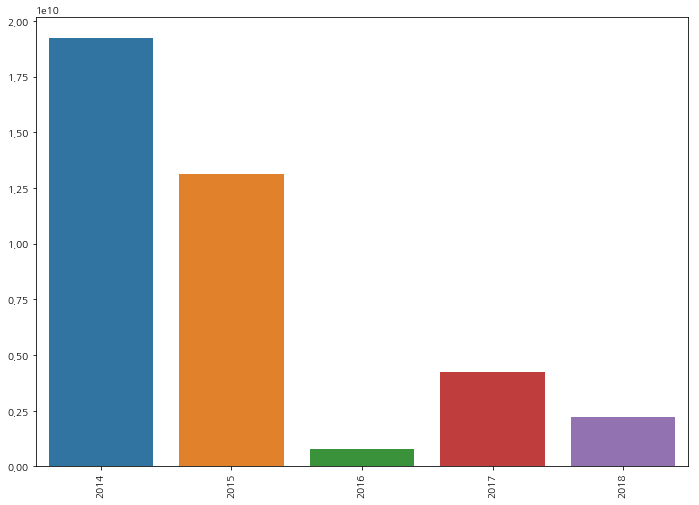

In [14]:
print_barplot_series(series=sr_depre_year )
# sns.barplot(x=df_depre_year.index.tolist(), y=df_depre_year)

In [15]:
sr_depre_depart_name = df_depre.groupby(by=[df_depre.depart_name]).sum().original_price
sr_depre_depart_name

depart_name
AI/블록체인/R&D센터             61450084
AI팀                       29277046
ASTRO GSSHOP(말레이시아)        2047986
CEO실                      23287281
CI사업부                      4767205
CX팀                      169716217
CoE                        6777750
DM팀                       23014071
HR부문                        928231
HS18(인도)                   3047130
Huimai(중국)                 3049288
IB금융팀                      1106156
IT개발운영팀                10901167012
IT인프라운영팀                 785996897
M&A실                       9028669
MC팀                       83220069
MNC SHOP(인니)                929373
Micro SVC팀              9232131783
My Shop 영업팀             2312717573
My shop 컨텐츠팀               6722078
M디지털하우스팀                  24157411
M마케팅사업부                  416376313
M마케팅팀                   2538833759
M백화점팀                    120487311
M상품사업부                      960085
M상품운영팀                    53807477
M전략사업부                    95344248
M채널팀                      14524086
M트렌드팀   

In [17]:
sr_depre_depart_name = sr_depre_depart_name.sort_values(ascending=False)
sr_depre_depart_name

depart_name
IT개발운영팀                10901167012
Micro SVC팀              9232131783
데이터팀                    3744304359
e사업부                    3204147295
M마케팅팀                   2538833759
My Shop 영업팀             2312717573
보안센터                    1582401659
IT인프라운영팀                 785996897
금융팀                      762407910
재경팀                      649990456
M마케팅사업부                  416376313
상품전략팀                    280284179
배송서비스팀                   248458061
영상아트팀                    194372507
인사팀기타                    191270216
CX팀                      169716217
영상제작2팀                   151094595
인사팀                      144193913
홍보팀                      126858864
M백화점팀                    120487311
이천물류센터                   119562752
M전략사업부                    95344248
트렌드PD팀                    88535082
MC팀                       83220069
서비스기획팀                    80775338
OB금융팀                     75703009
라이프패션팀                    75231435
AI/블록체인/R&D센터             61450084
심의팀     

In [19]:
for depart in sr_depre_depart_name.index.tolist():
    if 'ai' in depart or 'AI' in depart:
        print(depart)

AI/블록체인/R&D센터
AI팀
Huimai(중국)


In [20]:
sr_depre_depart_name = sr_depre_depart_name.head(20)
sr_depre_depart_name

depart_name
IT개발운영팀        10901167012
Micro SVC팀      9232131783
데이터팀            3744304359
e사업부            3204147295
M마케팅팀           2538833759
My Shop 영업팀     2312717573
보안센터            1582401659
IT인프라운영팀         785996897
금융팀              762407910
재경팀              649990456
M마케팅사업부          416376313
상품전략팀            280284179
배송서비스팀           248458061
영상아트팀            194372507
인사팀기타            191270216
CX팀              169716217
영상제작2팀           151094595
인사팀              144193913
홍보팀              126858864
M백화점팀            120487311
Name: original_price, dtype: int64

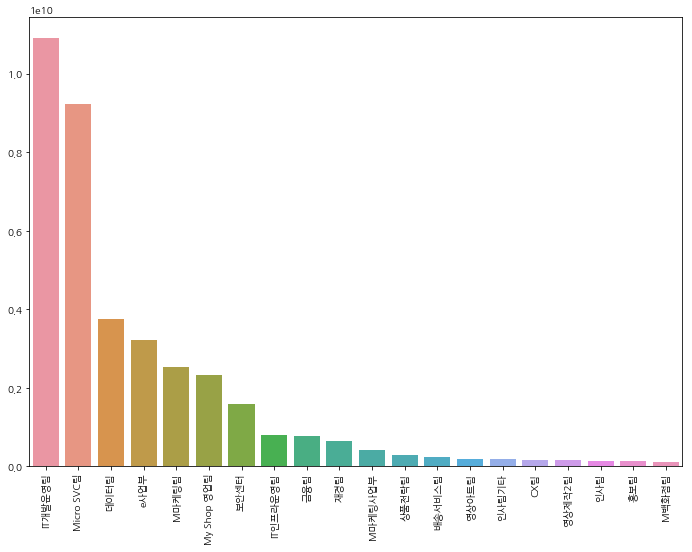

In [25]:
print_barplot_series(sr_depre_depart_name)

In [26]:
cost_top3 = sr_depre_depart_name.head(3).index.tolist()

In [27]:
df_depre_depart_year = df_depre.groupby(by=['depart_name', 'intro_year']).sum()
df_depre_depart_year

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>original_price</th>
    </tr>
    <tr>
      <th>depart_name</th>
      <th>intro_year</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">AI/블록체인/R&amp;D센터</th>
      <th>2014</th>
      <td>8641703.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>7025687.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>7340365.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>9925574.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>28516755.0</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">AI팀</th>
      <th>2014</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>29277046.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">ASTRO GSSHOP(말레이시아)</th>
      <th>2014</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>1088267.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>959719.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">CEO실</th>
      <th>2014</th>
      <td>2650664.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>7697636.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>1640644.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>8863347.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>2434990.0</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">CI사업부</th>
      <th>2014</th>
      <td>818937.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>3948268.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">CX팀</th>
      <th>2014</th>
      <td>3140474.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>163152044.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>2464032.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>959667.0</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">프로세스혁신팀</th>
      <th>2014</th>
      <td>2740387.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>929373.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>1837533.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1582290.0</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">해외개발팀</th>
      <th>2014</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">해외사업부</th>
      <th>2014</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>2517041.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>1993288.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">해외사업팀</th>
      <th>2014</th>
      <td>2892301.0</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>15732034.0</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>3289962.0</td>

In [28]:
df_depre_depart_year.original_price = df_depre_depart_year.original_price.fillna(0).astype('int')

In [29]:
df_depre_depart_year = df_depre_depart_year.loc[cost_top3, :]

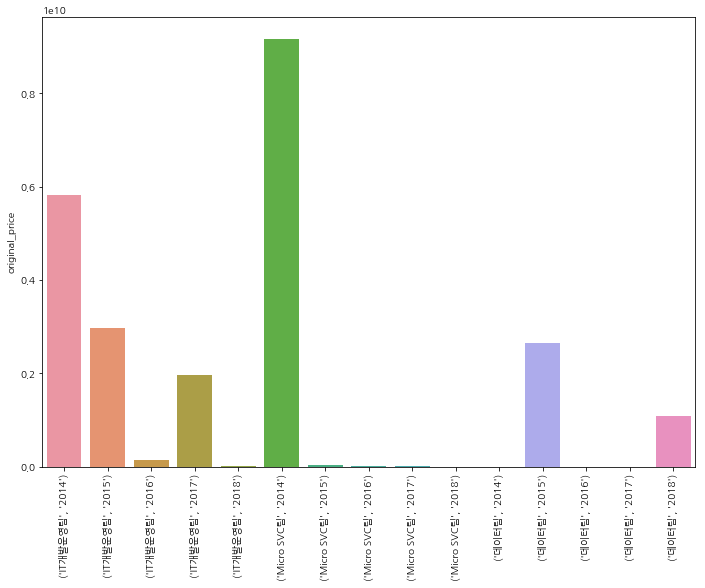

In [30]:
print_barplot(x=df_depre_depart_year.index, y=df_depre_depart_year.original_price)

In [31]:
df_depre_depart_year

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>original_price</th>
    </tr>
    <tr>
      <th>depart_name</th>
      <th>intro_year</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">IT개발운영팀</th>
      <th>2014</th>
      <td>5823677889</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>2963210823</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>135349177</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>1972635021</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>6294102</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">Micro SVC팀</th>
      <th>2014</th>
      <td>9170895904</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>28876362</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>22513461</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>8012578</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1833478</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">데이터팀</th>
      <th>2014</th>
      <td>2951534</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>2646803157</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1094549668</td>
    </tr>
  </tbody>
</table>
</div>

In [32]:
df_2017_cate_size = df_depre.loc[df_depre.intro_year == '2017']
sr_2017_cate_size = df_2017_cate_size.groupby(by=['cate_name']).count().original_price
sr_2017_cate_size 

cate_name
소프트웨어-기타                 0
소프트웨어-보안 소프트웨어           0
소프트웨어-사내App개발           10
소프트웨어-상용소프트웨어            6
소프트웨어-서버용 소프트웨어          0
영상/음향장비                  5
오디오관련장비                  1
전산장비-OA주변기기-테블릿, 기타      5
전산장비-기타                  1
전산장비-네트워크장비             16
전산장비-노트북PC             270
전산장비-데스크탑PC              4
전산장비-모니터                 2
전산장비-보안장비                0
전산장비-서버                 39
전산장비-서버주변기기              7
전산장비-프린터 및 관련기기          2
Name: original_price, dtype: int64

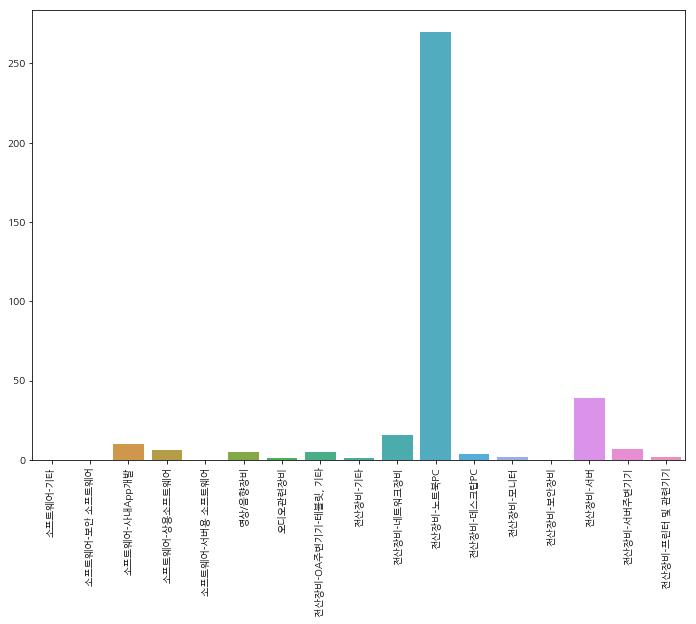

In [33]:
print_barplot_series(series=sr_2017_cate_size)

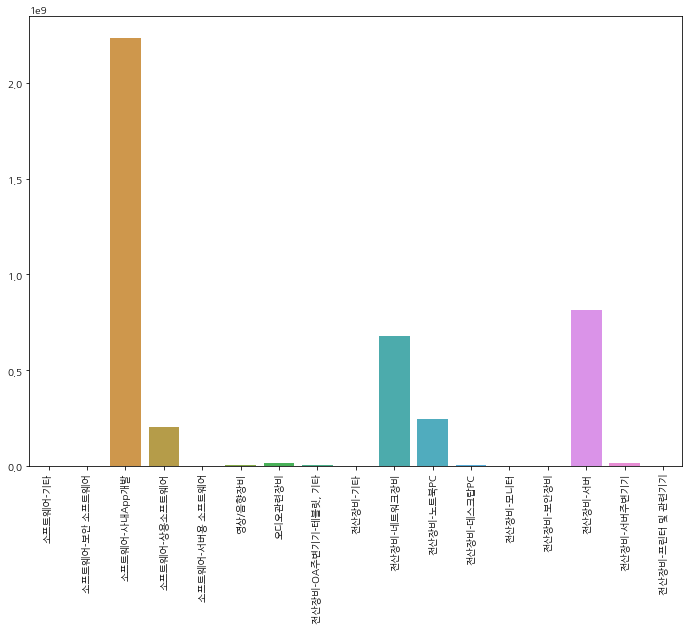

In [34]:
sr_2017_cate_size = df_2017_cate_size.groupby(by=['cate_name']).sum().original_price
print_barplot_series(series=sr_2017_cate_size)

In [35]:
df_depre.loc[(df_depre.cate_name == '소프트웨어-사내App개발') & (df_depre.intro_year == '2017')]

,asset_name,asset_class_name,original_price,depart_name,cate_name,intro_date,intro_year
3695,데이터홈쇼핑 플랫폼 확장 Skylife [My Shop팀-16-0006],컴퓨터소프트웨어(4년),73736580,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3696,데이터홈쇼핑 플랫폼 확장 LGU+ [My Shop팀-16-0006],컴퓨터소프트웨어(4년),227012095,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3697,데이터홈쇼핑 플랫폼 확장 KT [My Shop팀-16-0006],컴퓨터소프트웨어(4년),101559135,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3698,데이터홈쇼핑 플랫폼 확장 SKB [My Shop팀-16-0006],컴퓨터소프트웨어(4년),225168796,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3699,데이터홈쇼핑 플랫폼 확장 KCTV [My Shop팀-16-0006],컴퓨터소프트웨어(4년),133637825,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3700,데이터홈쇼핑 플랫폼 확장 T-broad [My Shop팀-16-0006],컴퓨터소프트웨어(4년),107628850,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3701,데이터홈쇼핑 플랫폼 확장 CJHV [My Shop팀-16-0006],컴퓨터소프트웨어(4년),107628850,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3702,데이터홈쇼핑 플랫폼 확장 HCN [My Shop팀-16-0006],컴퓨터소프트웨어(4년),99796321,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3704,데이터홈쇼핑 플랫폼 확장 LGU+ KitKat [My Shop팀-17-0024],컴퓨터소프트웨어(4년),16020000,My Shop 영업팀,소프트웨어-사내App개발,2017.09.01,2017
3705,SMTC Capacity 확장 [IT인프라운영팀-16-0020],컴퓨터소프트웨어(4년),1143916239,IT개발운영팀,소프트웨어-사내App개발,2017.09.01,2017
